<center><h1><strong> Twitter Sentiment Analysis using ML </strong></h1>

### Importing Dependencies

In [4]:
import pandas as pd
import numpy as np
import re 
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import nltk
from sklearn.utils import resample

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

### Data Preprocessing

In [7]:
import pandas as pd

file_path = r"C:\Users\rajku\twitter_training.csv\twitter_training.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

print(df.head())


   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [8]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
# checking the number of rows and columns
df.shape

(74681, 4)

In [10]:
# naming the cols and reading the dataset again
col_names = ['id', 'topic', 'sentiment', 'text']
df = pd.read_csv(r"C:\Users\rajku\twitter_training.csv\twitter_training.csv", 
                 names=col_names, encoding='ISO-8859-1')
print("Dataset with column names have been read.")

Dataset with column names have been read.


In [11]:
df.head()

,id,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [12]:
df.shape

(74682, 4)

In [13]:
# finding the missing values in the dataset
df.isnull().sum()

id             0
topic          0
sentiment      0
text         686
dtype: int64

<code> There are no missing values in the dataset. </code>

In [15]:
# finding the distribution of "sentiment" column
df['sentiment'].value_counts()

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: sentiment, dtype: int64

For our own convenience we can change Label "4" into "1". 1 means negative

In [16]:
df['sentiment'] = df['sentiment'].map({
    'Negative': 0,
    'Positive': 1,
    'Neutral': 2,
    'Irrelevant': 3
})
df['sentiment'].value_counts()


0    22542
1    20832
2    18318
3    12990
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

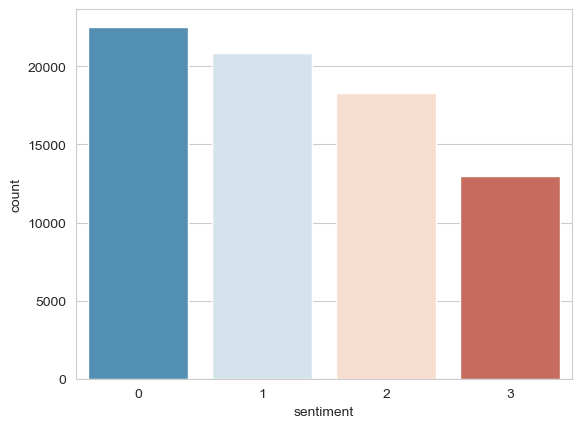

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.countplot(x='sentiment', data=df, palette='RdBu_r')

<code> Now, <br> 0 --> positive Tweet <br> 1 --> Positive Tweet </code>

In [20]:
# 0 → Negative  
# 1 → Positive  
# 2 → Neutral  
# 3 → Irrelevant

df_negative   = df[df['sentiment'] == 0]
df_positive   = df[df['sentiment'] == 1]
df_neutral    = df[df['sentiment'] == 2]
df_irrelevant = df[df['sentiment'] == 3]


In [21]:
df_positive_unsampled = resample(df_positive,replace=True,n_samples=len(df_negative),random_state=42)
df_balanced = pd.concat([df_negative,df_positive_unsampled])

In [23]:
df=df_balanced
df['sentiment'].value_counts()


0    22542
1    22542
Name: sentiment, dtype: int64

In [24]:
negative=df[df['sentiment'] == 0]
positive=df[df['sentiment'] == 1]

In [25]:
positive_sample=positive.sample(n=9000,random_state=25)
negative_sample=negative.sample(n=9000,random_state=25)

In [26]:
sampled_df=pd.concat([positive_sample,negative_sample])

In [27]:
sampled_df=sampled_df.sample(frac=1,random_state=1).reset_index(drop=True)
df=sampled_df


In [29]:
df['sentiment'].value_counts()

1    9000
0    9000
Name: sentiment, dtype: int64

In [30]:
df.head()

,id,topic,sentiment,text
0,3030,Dota2,1,soon i can finally see melee again. it is just...
1,1751,CallOfDutyBlackopsColdWar,1,Returning to one of the most prosperous and me...
2,2429,Borderlands,1,Bioshock And borderlands coming to the switch ...
3,2000,CallOfDutyBlackopsColdWar,1,I would remain grateful.
4,9476,Overwatch,0,So why did @ PlayOverwatch set the season 23 p...


### Stemming

<code>STEMMING:</code> The process of reducing a word to it's root word.

e.g: diving, diver, dived == dive

In [31]:
port_stem = PorterStemmer()
port_stem

<PorterStemmer>

In [32]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    
    return stemmed_content

In [38]:
# Fill missing text with empty string
df['text'] = df['text'].fillna('')

# Then apply stemming
df['stemmed_content'] = df['text'].apply(stemming)


In [39]:
df.head()

,id,topic,sentiment,text,stemmed_content
0,3030,Dota2,1,soon i can finally see melee again. it is just...,soon final see mele ice leffen compet lul also...
1,1751,CallOfDutyBlackopsColdWar,1,Returning to one of the most prosperous and me...,return one prosper memor video game seri time ...
2,2429,Borderlands,1,Bioshock And borderlands coming to the switch ...,bioshock borderland come switch bitch count fuck
3,2000,CallOfDutyBlackopsColdWar,1,I would remain grateful.,would remain grate
4,9476,Overwatch,0,So why did @ PlayOverwatch set the season 23 p...,playoverwatch set season placement cap sr


In [40]:
print(df['stemmed_content'])


0        soon final see mele ice leffen compet lul also...
1        return one prosper memor video game seri time ...
2         bioshock borderland come switch bitch count fuck
3                                       would remain grate
4                playoverwatch set season placement cap sr
                               ...                        
17995                           dude fuck even passa pleas
17996    done rainbow game unless hit squad okay know m...
17997    although might actual actual tri fabl time aro...
17998    nba k game mean suck fuck tf pure slasher hitt...
17999    damn call duti made statement live black game ...
Name: stemmed_content, Length: 18000, dtype: object


In [41]:
print(df['sentiment'])

0        1
1        1
2        1
3        1
4        0
        ..
17995    0
17996    0
17997    1
17998    0
17999    1
Name: sentiment, Length: 18000, dtype: int64


In [43]:
# seperating stemmed data and label
X = df['stemmed_content'].values
Y = df['sentiment'].values


In [44]:
print(X)

['soon final see mele ice leffen compet lul also work day month late fight hour work day still proud manag becom immort dota'
 'return one prosper memor video game seri time call duti black op cold war set earli height cold war direct sequel call duti black op youtu mt rj qk'
 'bioshock borderland come switch bitch count fuck' ...
 'although might actual actual tri fabl time around never play xbox cant wait also see someth'
 'nba k game mean suck fuck tf pure slasher hittin unk'
 'damn call duti made statement live black game start good shit infinityward']


In [45]:
print(Y)

[1 1 1 ... 1 0 1]


### Splitting Data into Training and Testing Data

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [47]:
print(X.shape,X_train.shape,X_test.shape)

(18000,) (14400,) (3600,)


In [48]:
print(X_train)

['thing absolut describ cap anxiou feel right world list task must done task go get cash reward particular task formula sooth toward'
 'super feel realli inadequ'
 'rockstargam good veteran gta year togeth absolut lov english game realli realli good realli guy need sort game hard'
 ...
 'need ai precis program text respons work realli well hellcomput dot com'
 'hi sever game want back show user fortnit glitch epicgames'
 'finish main stori red dead redempt never forgiv game happen ashley william bastard']


In [49]:
print(X_test)

['sooo guess came facebook like actual feel good' 'excit releas'
 'think bot pubg terribl mistak damn hope somehow wrong youtu tgbwcw' ...
 'bait dawg alreadi say screw game damn minut'
 'love dream unbox fuck knife safari mesh csgo'
 'freddi mac mobil comcast provid wireless internet access turn wireless data nation crisi verizon nowher els think twice provid']


As ML algorithms do not recognize textual data, so we have to convert them into numerical data.

In [50]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
print(X_train)

  (0, 15223)	0.24439836797221454
  (0, 3619)	0.2854726523790613
  (0, 7702)	0.2807431072656834
  (0, 6714)	0.19428784708104427
  (0, 11387)	0.1918992252108499
  (0, 10446)	0.3283514965635757
  (0, 15969)	0.2807431072656834
  (0, 9710)	0.15812106136977008
  (0, 13068)	0.24720099742523485
  (0, 10026)	0.16135270039230987
  (0, 17136)	0.33217865038616673
  (0, 19203)	0.22264247700884063
  (0, 276)	0.29873341567717315
  (0, 12066)	0.39680518315990515
  (1, 6136)	0.3962199271626255
  (1, 12516)	0.5450983333038139
  (1, 1811)	0.7388352836381381
  (2, 15702)	0.31178549060203603
  (2, 5717)	0.3038673169768743
  (2, 13891)	0.24253063610691236
  (2, 19458)	0.5105115262576542
  (2, 13276)	0.4829925052690143
  (2, 3513)	0.4456515205521165
  (2, 7805)	0.2431548800960575
  (3, 5542)	0.42055130123629847
  :	:
  (14396, 6136)	0.12947701652679924
  (14397, 9894)	0.7039873500709143
  (14397, 15286)	0.5331611974989794
  (14397, 18598)	0.4691918034467207
  (14398, 4812)	0.445172886810449
  (14398, 1645)	0

In [51]:
print(X_test)

  (0, 8413)	0.5040376195917481
  (0, 5172)	0.23538102925649798
  (0, 3842)	0.41267566207990336
  (0, 3696)	0.25119199469404113
  (0, 3079)	0.3158451688372827
  (0, 2967)	0.3096002845514111
  (0, 1229)	0.40555477404990137
  (0, 79)	0.3115414052804941
  (1, 7449)	0.7351632103099386
  (1, 2892)	0.6778901490704708
  (2, 10410)	0.26104386583125494
  (2, 10196)	0.278975842412172
  (2, 9063)	0.2239742517487173
  (2, 9004)	0.46633847508813275
  (2, 8983)	0.2972281030619609
  (2, 8392)	0.32266396661539304
  (2, 7075)	0.23943819662213536
  (2, 5737)	0.31940811381687567
  (2, 4188)	0.2569630774832606
  (2, 2043)	0.23663393720130635
  (2, 1007)	0.3354968307865282
  (3, 10171)	0.16077784422925612
  (3, 9746)	0.2356931653770533
  (3, 9742)	0.14791278948306633
  (3, 8821)	0.20788027743240503
  :	:
  (3598, 9487)	0.4621724360400875
  (3598, 7818)	0.4621724360400875
  (3598, 5616)	0.40358125659032434
  (3598, 5297)	0.18497268229083105
  (3598, 4936)	0.40358125659032434
  (3598, 3389)	0.1790638658274878

### Training The ML Model

### Logistic Regression

In [52]:
model = LogisticRegression(max_iter=1000)

In [53]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

### ML Model Evaluation

#### Accuracy Score

In [54]:
X_train_predictions = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_predictions)

In [55]:
print(f"Accuracy on the training data is {training_data_accuracy}")

Accuracy on the training data is 0.8980555555555556


In [56]:
X_test_predictions = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_predictions)

In [57]:
print(f"Accuracy on the testing data is {testing_data_accuracy}")


Accuracy on the testing data is 0.8580555555555556


#### Saving The Trained Model

In [58]:
import pickle

In [59]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [60]:
filename_vectorizer = 'vectorizer.sav'
pickle.dump(vectorizer, open(filename_vectorizer, 'wb'))

#### Using The Saved Model For Future Predictions

In [61]:
# loading the saved model
loaded_model = pickle.load(open('./trained_model.sav', 'rb'))

In [62]:
X_new = X_test[309]
print(Y_test[309])
prediction = model.predict(X_new)
print(prediction)
if (prediction[0] == 0):
    print("It is a negative tweet.")
    
else:
    print("It is a positive tweet.")

1
[1]
It is a positive tweet.


In [63]:
from sklearn.metrics import confusion_matrix, classification_report

Y_test_predictions = model.predict(X_test)
print(confusion_matrix(Y_test, Y_test_predictions))
print(classification_report(Y_test, Y_test_predictions))


[[1556  244]
 [ 267 1533]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1800
           1       0.86      0.85      0.86      1800

    accuracy                           0.86      3600
   macro avg       0.86      0.86      0.86      3600
weighted avg       0.86      0.86      0.86      3600



In [64]:
new_tweet = "i am very sad that i am at 4th btech without any projects"

# Apply the same stemming function
new_tweet_stemmed = stemming(new_tweet)
print(new_tweet_stemmed)


sad th btech without project


In [65]:
# Load the saved vectorizer if needed
# vectorizer = pickle.load(open('vectorizer.sav', 'rb'))

new_tweet_vector = vectorizer.transform([new_tweet_stemmed])


In [66]:
# Load the trained model if needed
# loaded_model = pickle.load(open('trained_model.sav', 'rb'))

prediction = loaded_model.predict(new_tweet_vector)
print(prediction)  # numeric label


[0]


In [67]:
if prediction[0] == 0:
    print("It is a negative tweet.")
elif prediction[0] == 1:
    print("It is a positive tweet.")
elif prediction[0] == 2:
    print("It is a neutral tweet.")
else:
    print("It is an irrelevant tweet.")


It is a negative tweet.
